In [2]:
import pandas as pd
import numpy as np

###################

from scipy.stats import ttest_1samp, ttest_ind
from scipy.stats import norm
from scipy.stats import t

###################

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:/Users/D.Elistratov/Documents/Презентации лекций/Неделя 6/ПИТОН/Marketing_pilot.csv') #skymusic.marketing_pilot_proc

In [4]:
df['ad_date'] = pd.to_datetime(df['ad_date'])
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

df['flag_30'] = (df['ad_date'] + pd.Timedelta(days=30) > df['purchase_date']).astype(int)

r1 = df[df['id_group']==1]['flag_30']
r0 = df[df['id_group']==0]['flag_30']

In [15]:
dfs = pd.read_csv('C:/Users/D.Elistratov/Documents/Презентации лекций/Неделя 6/ПИТОН/SKYBANK.csv') #late_collection_client

In [16]:
dfs.head(5)

,id_client,id_global,id_city,gender,married,first_time,age,is_educ,cellphone,is_active,cl_segm,amt_loan,date_loan,credit_type
0,2756,1791.0,15.0,M,False,1.0,82.0,0.0,NaN,0.0,2.0,90000,2021-05-01,TOP-UP
1,2101,3978.0,1.0,F,False,1.0,84.0,0.0,8.916453e+10,0.0,2.0,500000,2020-02-05,POS-1
2,684,3409.0,2.0,M,False,1.0,84.0,1.0,8.916521e+10,1.0,2.0,440000,2021-04-23,POS-1
3,1330,1880.0,2.0,M,False,1.0,44.0,0.0,8.985401e+10,1.0,2.0,440000,2021-04-30,CC
4,734,3494.0,2.0,M,False,1.0,84.0,1.0,8.916150e+10,1.0,2.0,200000,2019-07-13,POS-1


In [6]:
r1s = dfs[dfs['gender']=='M']['amt_loan']
r0s = dfs[dfs['gender']=='F']['amt_loan']

In [44]:
import numpy as np

#x1_avg = r1s.mean()
#x1_var = r1s.var()

x1_stddev = np.std(r1s)
x1_avg = np.mean(r1s)
x1_var = np.var(r1s)


q1 = r1s.quantile([0.25,0.5,0.6,0.75])

q2 = np.quantile(r1s, [0.25,0.5,0.6,0.75])

In [45]:
print(q1)
print(type(q1))

0.25    100000.0
0.50    250000.0
0.60    400000.0
0.75    650000.0
Name: amt_loan, dtype: float64
<class 'pandas.core.series.Series'>


In [46]:
print(q2)
print(type(q2))

[100000. 250000. 400000. 650000.]
<class 'numpy.ndarray'>


In [48]:
q1 = r1s.quantile([0.25])

In [287]:
df_grouped

,promo_type,delta
0,Bundle Limited,104.504898
1,Gold Bundle,104.285027
2,Platinum Bundle,104.303458
3,Std Bundle,105.036266


In [ ]:
#### CDF - Cumulative Distribution Function
#### PPF - Обратная кумулятивная функция распределения
#### PDF - Probability Density Function



In [145]:
norm.ppf(0.975)

1.959963984540054

In [146]:
norm.cdf(1.959963984540054)

0.975

In [147]:
norm.pdf(0.975)

0.24801872461073715

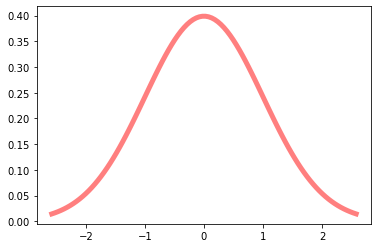

In [87]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,1)

x = np.linspace(norm.ppf(0.005),
                norm.ppf(0.995), 100)
ax.plot(x, norm.pdf(x),
       color = 'r', lw=5, alpha=0.5#, label='norm pdf'
       )
#ax.plot(x, norm.cdf(x),
#       'b', lw=5, alpha=0.6#, label='norm cdf'
#       )

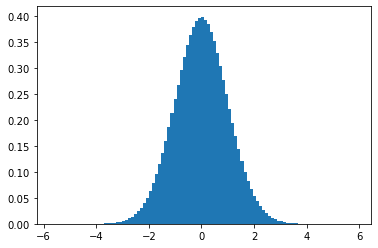

In [155]:
student = np.random.standard_t(100, size=11500000)
h = plt.hist(student, bins=100
             , density=True
            )

In [107]:
len(student)


11500000

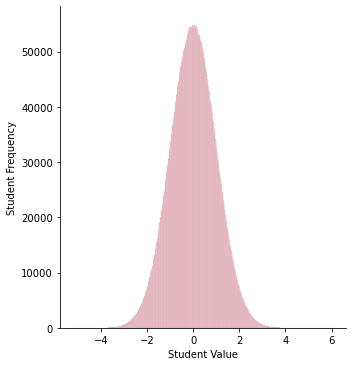

In [115]:
import seaborn

ax = seaborn.displot(student,
                #kde=True, ###Kernel Density Estimation
                #norm_hist = True,
                color='pink'
                   )
ax.set(xlabel='Student Value',ylabel='Student Frequency')
#plt.xticks(np.unique(student));

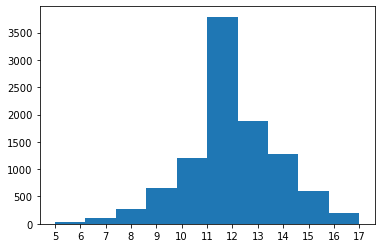

In [125]:
from scipy.stats import binom


data=binom.rvs(n=17,p=0.7,loc=0,size=10000)
plt.hist(data)
plt.xticks(np.unique(data));

In [119]:
#len(data)

10000

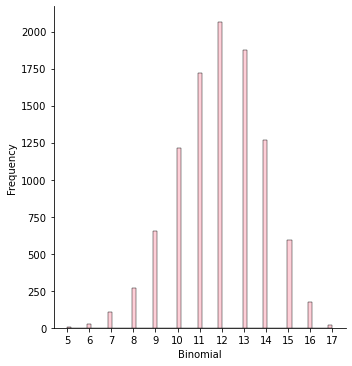

In [153]:
ax=seaborn.displot(data,
                #kde=True, ###Kernel Density Estimation
                color='pink',
                   )
ax.set(xlabel='Binomial',ylabel='Frequency')
plt.xticks(np.unique(data));

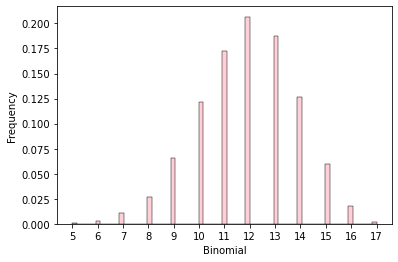

In [154]:
ax=seaborn.histplot(data,
                #kde=True, ###Kernel Density Estimation
                color='pink',
                stat = 'probability'
                   )
ax.set(xlabel='Binomial',ylabel='Frequency')
plt.xticks(np.unique(data));

In [128]:
17*0.7

11.899999999999999

In [129]:
data.mean()

11.9086

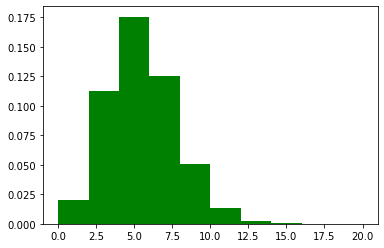

In [141]:
s=np.random.poisson(5, 1000000)
plt.hist(s
         ,color='Green'
         , density = True
        );


In [156]:
s

array([9, 6, 4, ..., 9, 9, 9])

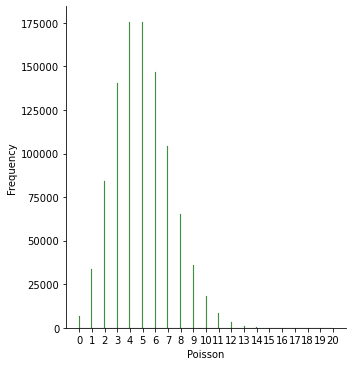

In [143]:
ax=seaborn.displot(s,
                #kde=True,
                color='green',
                #hist_kws={"linewidth": 22,'alpha':0.77}
                   )
ax.set(xlabel='Poisson',ylabel='Frequency')
plt.xticks(np.unique(s));